## Clustering and Topic Modeling

### PCA and Clustering

Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data. By keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means.

In [344]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(11161, 5234)

### Importing Libraries

In [345]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

### We can pick the number of clusters by varying it in a range of possible values and compute the silhouette score and the distorsion at every iteration.

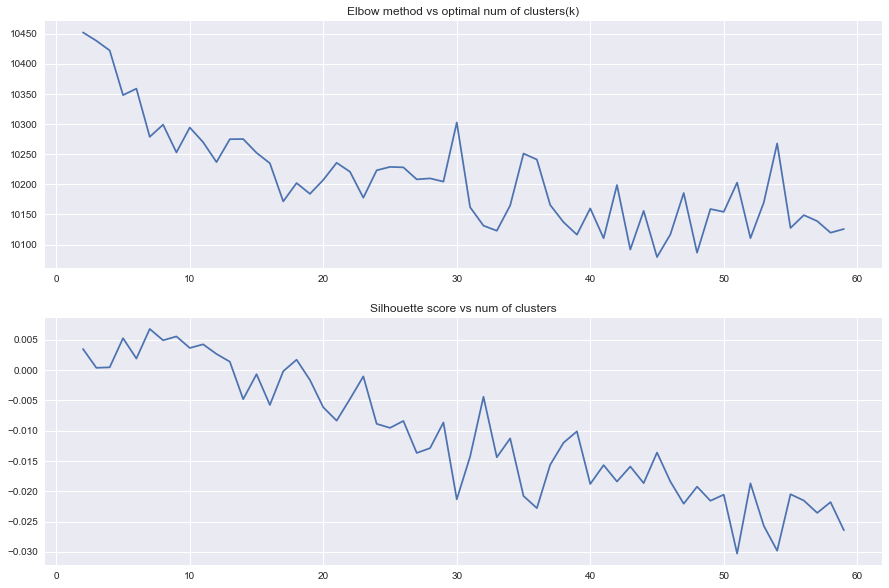

In [346]:
inertias = []
sil_scores = []
k_max = 60
for k in range(2, k_max):
    k_means = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
    k_means.fit(X_reduced)
    sil_score = silhouette_score(X_reduced, k_means.labels_)
    sil_scores.append(sil_score)
    inertias.append(k_means.inertia_)


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.plot(range(2, k_max), inertias)
ax1.set_title('Elbow method vs optimal num of clusters(k)')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)


#### In this plot we can see that the better k values after 20 does not change much. After that, the decrease in distortion is not as significant. Taking the inertias and silhouette score in consideration, we will use k=20.

In [347]:
k = 20

k_means_model = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
k_means = k_means_model.fit(X_reduced)
k_means_clusters = k_means.predict(X_reduced)
df_processed['clusters'] = k_means_clusters

### Keywords describing each cluster

In [348]:
# Let's look at the keywords that describe each cluster

centroids = k_means.cluster_centers_.argsort()[:, ::-1]
key_terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(k):
    topic_keywords = []
    for j in centroids[i, :10]:
        topic_keywords.append(key_terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['cluster_{0}'.format(i) for i in range(k)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
keywords_df
    

keyword_0           keyword_1             keyword_2  \
cluster_0             advocates           aggregate              abc news   
cluster_1                 aaron   abhishek bachchan              abhishek   
cluster_2                abbott            abc news   abbott laboratories   
cluster_3                abbott            aberdeen               abating   
cluster_4                 aaron          absolutely                abroad   
cluster_5                 aaron          absolutely                abrupt   
cluster_6   abbott laboratories            asuncion                  arts   
cluster_7             abandoned              abbott              aberdeen   
cluster_8               ability                acce                adding   
cluster_9                 ababa           abandoned              abc news   
cluster_10                aaron              aboard         across nation   
cluster_11               abbott            abc news              accepted   
cluster_12        according new              accept            accidental   
cluster_13                aaron             ability                aboard   
cluster_14                  abc   abhishek bachchan                 ababa   
cluster_15       access trusted  acceptance summary  according government   
cluster_16              abandon           abandoned                 ababa   
cluster_17             abc news       accommodation                 abuse   
cluster_18           accelerate            absentee               academy   
cluster_19             activist          accessible           acquisition   

                    keyword_3             keyword_4            keyword_5  \
cluster_0   announced tuesday                active                agent   
cluster_1              abbott                 abuse            abandoned   
cluster_2            abattoir               abating               abrupt   
cluster_3            abattoir               ability    abhishek bachchan   
cluster_4              abbott                 abuja            abandoned   
cluster_5              abroad                 abuja                  abu   
cluster_6                camp             ahead new          agency said   
cluster_7               abuse               ability               abroad   
cluster_8        adds details     acute respiratory               absent   
cluster_9              abbott               ability                 able   
cluster_10           activity           accelerated        across canada   
cluster_11       accelerating            accidental           acceptance   
cluster_12           abruptly       according state  according statement   
cluster_13           abhishek             abandoned                  abc   
cluster_14            absence               abating               aboard   
cluster_15             abbott                adrian             abc news   
cluster_16                abc              abc news               abrupt   
cluster_17     according data              aberdeen      according state   
cluster_18          academics          accelerating                  abo   
cluster_19             acting  according government                adopt   

                     keyword_6         keyword_7            keyword_8  \
cluster_0             adds new     across europe         adopted euro   
cluster_1             abc news       accelerated   according official   
cluster_2             abhishek           abandon              ability   
cluster_3               abrupt           abandon               abroad   
cluster_4               abrupt              acce    abhishek bachchan   
cluster_5           acceptance         activated          active case   
cluster_6         biotech firm          billions         avoid public   
cluster_7               absent            accept                  abu   
cluster_8        among younger             alone                  bag   
cluster_9                  acc       alex castro   according research   
clus

Let's look at some clusters, and try to summarize them in one sentence based on their keywords:

Since all the articles are based on covid or coronavirus, it is difficult to differentiate topics based on the top 10 keywords and we see that some keywords repeat in most of the clusters. However there is still some clustering that is noticable

Cluster 0 : Based on international news covering europe and euro;
Cluster 18: Academia probably schools and universities;
Cluster 6: Abbott Laboratories, biotech industry

Apart from these looks like the Abhishek bacchan and the Bacchan family covid case was covered by various sources and see that commonly accross all clusters.

To get better seperation of articles based on topics, LDA will be used further.

### Dimensionality Reduction with t-SNE

Using t-SNE we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the combined_text can be plotted.

In [349]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_2d = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 11161 samples in 15.524s...
[t-SNE] Computed neighbors for 11161 samples in 3251.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11161
[t-SNE] Computed conditional probabilities for sample 2000 / 11161
[t-SNE] Computed conditional probabilities for sample 3000 / 11161
[t-SNE] Computed conditional probabilities for sample 4000 / 11161
[t-SNE] Computed conditional probabilities for sample 5000 / 11161
[t-SNE] Computed conditional probabilities for sample 6000 / 11161
[t-SNE] Computed conditional probabilities for sample 7000 / 11161
[t-SNE] Computed conditional probabilities for sample 8000 / 11161
[t-SNE] Computed conditional probabilities for sample 9000 / 11161
[t-SNE] Computed conditional probabilities for sample 10000 / 11161
[t-SNE] Computed conditional probabilities for sample 11000 / 11161
[t-SNE] Computed conditional probabilities for sample 11161 / 11161
[t-SNE] Mean sigma: 0.344996
[t-SNE] KL diver

### Let's take a look at what our data looks like when compressed to 2 dimensions

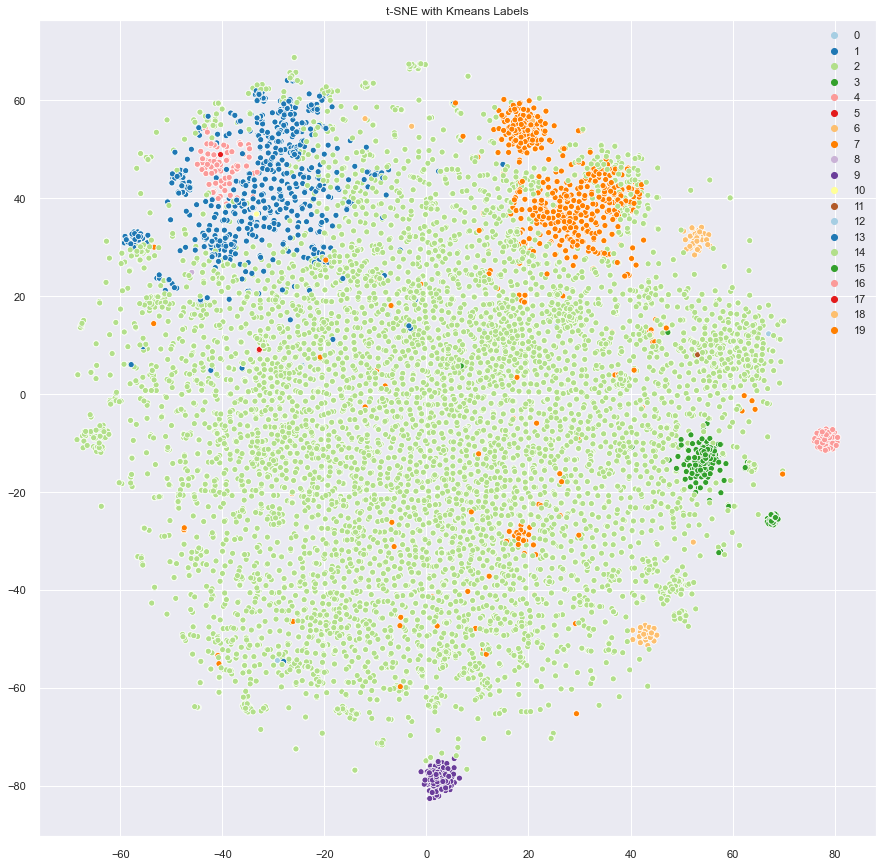

In [350]:
# Let's plot the 20 clusters we generated using KMeans
#sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("Paired", 20)

# plot
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue=k_means_clusters, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()

The labeled plot gives better insight into how the articles are grouped. The location of each article on the plot was determined by t-SNE while the label-color was determined by k-means. If we look at the plot where t-SNE has grouped articles into clusters, it shows that k-means was uniform in labeling that cluster (same color groups). This behavior shows that structure within the data can be observed and measured to some extent. However there are still a large number of articles that are spread out on the plot. This is a result of t-SNE and k-means finding different connections in the higher dimensional data. The topics of these articles often intersect so it hard to cleanly separate them, specially in our case since all the articles are relating to covid and many sources could cover similar news pertaining to single topic.

### We can further use LDA for topic modeling to find most significant words in each cluster.

#### Additionally let's also visualize how the articles are spread out on a 2d plot based on its category we extracted using the source feature of NewsApi.

In [351]:
tsne_tfidf_df = pd.DataFrame(X_2d)
tsne_tfidf_df.columns = ['x', 'y']
tsne_tfidf_df['category'] = df_processed['category']
tsne_tfidf_df['combined_text'] = df_processed['combined_text']

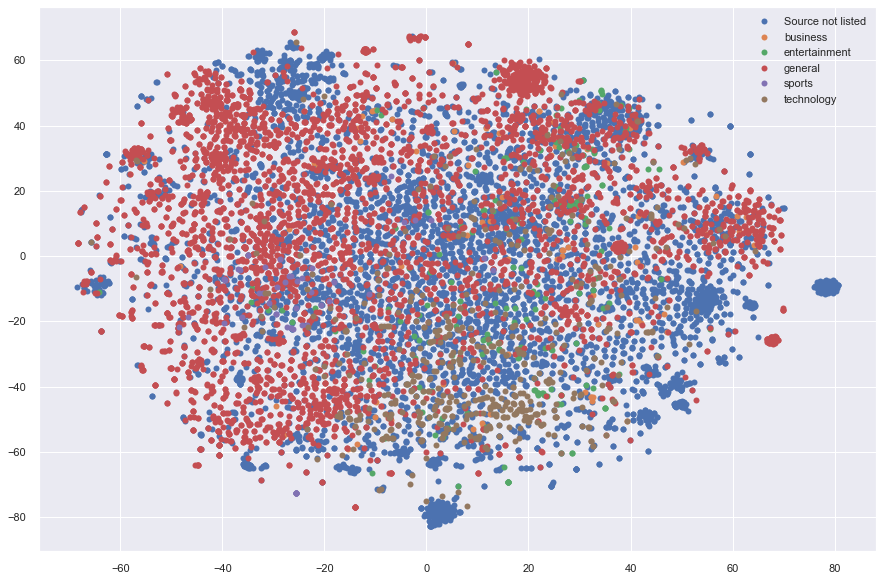

In [352]:
groups = tsne_tfidf_df.groupby('category')
fig, ax = plt.subplots(figsize=(15, 10))

for category, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=category)
ax.legend()
plt.show()


From the above plot we can see that most of the articles that are spread out belong to general category or the list where no category is available. This did not help the clustering algorithm as well as all the articles belonged to one topic, however the goal was to differentiate between categories.

Kmeans separates the documents into disjoint clusters. the assumption is that each cluster is attributed a single topic. However, descriptions may in reality be characterized by a "mixture" of topics. 

We will deal with this problem with the LDA algorithm.

### Topic Modeling on Each Cluster using LDA (Latent Dirichlet Allocation)

### Importing Libraries

In [353]:
from sklearn.decomposition import LatentDirichletAllocation
import gensim.corpora as corpora
from gensim import matutils
from gensim.models import CoherenceModel
from tqdm import tqdm, tqdm_notebook
#tqdm.pandas(desc="progress-bar")

### Create a corpus and dictionary from the tokens

In [354]:
# Create a corpus and dictionary from the tokens

lda_copy = df_processed.copy()

bigram = gensim.models.Phrases(lda_copy['tokens'], min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
lda_copy['bigram_tokens'] = lda_copy['tokens'].progress_map(lambda tokens: bigram_mod[tokens])

id2word = corpora.Dictionary(lda_copy['bigram_tokens'])
texts = lda_copy['bigram_tokens'].values
corpus = [id2word.doc2bow(text) for text in texts]



progress-bar:   0%|                                                                          | 0/11161 [00:00<?, ?it/s]

progress-bar:   1%|▎                                                               | 62/11161 [00:00<00:18, 615.50it/s]

progress-bar:   4%|██▍                                                            | 442/11161 [00:00<00:13, 821.82it/s]

progress-bar:   7%|████▏                                                         | 754/11161 [00:00<00:09, 1054.15it/s]

progress-bar:  12%|███████▌                                                     | 1378/11161 [00:00<00:06, 1403.57it/s]

progress-bar:  18%|██████████▉                                                  | 1991/11161 [00:00<00:05, 1824.73it/s]

progress-bar:  24%|██████████████▉                                              | 2727/11161 [00:00<00:03, 2354.73it/s]

progress-bar:  30%|██████████████████▌                                          | 3398/11161 [00:00<00:02, 2921.33it/s]

progress-bar:  37%|███████████

In [355]:
#Exploring the new dataframe with bigram tokens
lda_copy

author  \
0      https://www.facebook.com/bbcnews   
1                       Nicole Gallucci   
2      https://www.facebook.com/bbcnews   
3                          Jody Serrano   
4                     Reuters Editorial   
...                                 ...   
11156                 Reuters Editorial   
11157                 Reuters Editorial   
11158                 Reuters Editorial   
11159                 Reuters Editorial   
11160                 Reuters Editorial   

                                                   title  \
0      Coronavirus: Three generations of Bollywood Ba...   
1      COVID-19 patient's last words to nurse: 'I tho...   
2      Coronavirus: South Africa bans alcohol sales a...   
3      Florida Records 15,000 New Covid-19 Cases in a...   
4      Bollywood's Bachchan tests positive for COVID-...   
...                                                  ...   
11156  Influential Libyan interior minister suspended...   
11157  Cricket-Australia 'blow cobwebs out' in rain-a...   
11158  Cricket: Australia 'blow cobwebs out' in rain-...   
11159  Cricket: Australia 'blow cobwebs out' in rain-...   
11160  China embassy says Britain is distorting Beiji...   

                                             description  \
0      Actress Aishwarya Rai Bachchan, her father-in-...   
1      As people across the United States continue to...   
2      It is one of several restrictions introduced b...   
3      Florida broke the nation’s covid-19 single-day...   
4      India's most famous actor, Amitabh Bachchan, a...   
...                                                  ...   
11156  The head of Libya's internationally recognised...   
11157  Australian wicketkeeper-batsman Matthew Wade w...   
11158  Australian wicketkeeper-batsman Matthew Wade w...   
11159  Australian wicketkeeper-batsman Matthew Wade w...   
11160  British politicians are twisting facts in orde...   

                                                     url  \
0      https://www.bbc.co.uk/news/world-asia-india-53...   
1      https://mashable.com/article/coronavirus-patie...   
2       https://www.bbc.co.uk/news/world-africa-53382797   
3      https://gizmodo.com/florida-records-15-000-new...   
4        https://www.reuters.com/video/watch/idOVCMIEUL9   
...                                                  ...   
11156  https://af.reuters.com/article/topNews/idAFKBN...   
11157  https://in.reuters.com/article/cricket-austral...   
11158  https://uk.reuters.com/article/uk-cricket-aust...   
11159  https://in.reuters.com/article/cricket-austral...   
11160  https://www.reuters.com/article/us-china-brita...   

                                              urlToImage publishedAt  \
0      https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
1      https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12   
2      https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
3      https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12   
4      https://static.reuters.com/resources/r/?d=2020...  2020-07-12   
...                                                  ...         ...   
11156  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29   
11157  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11158  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11159  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11160  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   

                                                 content source.id  \
0      Image copyrightReutersImage caption\r\n Abhish...  bbc-news   
1      As people across the United States continue to...  mashable   
2      Image copyrightAFPImage caption\r\n This is th...  bbc-news   
3      Florida broke the nations covid-19 single-day ...       NaN   
4      Posted \r\nIndia's most famous actor, Amitabh ...   reuters   
...                                                  ...       ...  

In [356]:
# Function defining the LDA model that takes number of topics as a parameter
def LDA_model(num_topics, passes=1):
    return gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               eval_every=10,
                                               chunksize=2000,
                                               passes=passes,
                                               per_word_topics=True
                                            )

In [357]:
# Function to assess a good topic model by calculating the coherence score for number of topics to pick for training
def coherence_score(model):
    coherence = CoherenceModel(model=model, 
                           texts=lda_copy['bigram_tokens'].values,
                           dictionary=id2word, coherence='c_v')
    return coherence.get_coherence()

In [358]:
#Function to display topics and corresponding keywords
def display_topics(model):
    topics = model.show_topics(num_topics=model.num_topics, formatted=False, num_words=10)
    topics = map(lambda c: map(lambda cc: cc[0], c[1]), topics)
    df = pd.DataFrame(topics)
    df.index = ['topic_{0}'.format(i) for i in range(model.num_topics)]
    df.columns = ['keyword_{0}'.format(i) for i in range(1, 10+1)]
    return df

### Graph of coherence scores for different number of topics

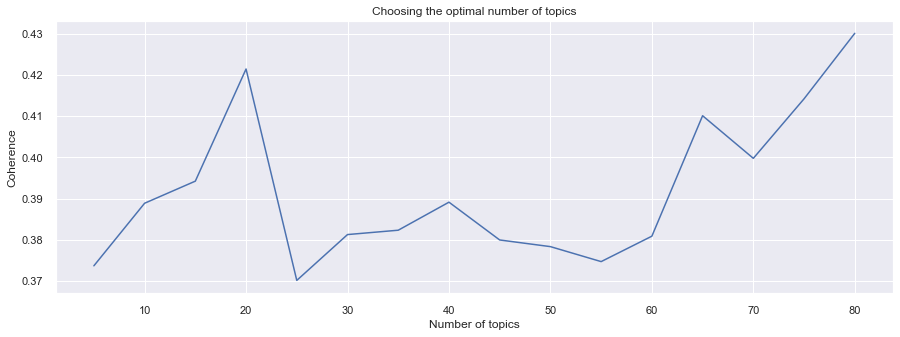

In [359]:
#Like Kmeans, we can vary the number of topics in an interval and pick the number that optimizes the coherence score.

def explore_models(df, rg=range(5, 25)):
    id2word = corpora.Dictionary(df['bigram_tokens'])
    texts = df['bigram_tokens'].values
    corpus = [id2word.doc2bow(text) for text in texts]

    models = []
    coherences = []
    
    for num_topics in tqdm_notebook(rg, leave=False):
        lda_model = LDA_model(num_topics, passes=5)
        models.append(lda_model)
        coherence = coherence_score(lda_model)
        coherences.append(coherence)
      

    fig = plt.figure(figsize=(15, 5))
    plt.title('Choosing the optimal number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence')
    plt.grid(True)
    plt.plot(rg, coherences)
    
    return coherences, models


coherences, models = explore_models(lda_copy, rg=range(5, 85, 5))

#### We are quite consistent with the KMeans approach where we chose 20 clusters based on elbow method and silhouette score. 20 seems to be a good number of topics, since it's a value after which the coherence stops increasing rapidly.

In [414]:
# Let's display the 20 topics and its associated keywords using the LDA_model function
best_model = LDA_model(num_topics=20, passes=5)

display_topics(model=best_model)

keyword_1      keyword_2         keyword_3  keyword_4   keyword_5  \
topic_0       health         public               new     people   officials   
topic_1      company            new               one      today       years   
topic_2        first            aug              make       cost        take   
topic_3       shares           find         australia      virus      stocks   
topic_4         said          world             cases    million         new   
topic_5        trump      president  president_donald      night         cnn   
topic_6         open            api              park    accused        slow   
topic_7         year         season              next     series        play   
topic_8   democratic  international          security       vote    research   
topic_9      disease       sars_cov          patients   business       study   
topic_10      school       students        convention       back       women   
topic_11       first           test           million      biden    positive   
topic_12    children         people           schools        one        kids   
topic_13      travel        germany           virtual     german  face_masks   
topic_14         oil          trade         questions      court     welcome   
topic_15         new          state              said      cases        city   
topic_16  university     california       researchers       show        beat   
topic_17     vaccine           news          vaccines  potential      canada   
topic_18        said          right              call  need_know   democrats   
topic_19         new          cases          reported     deaths      health   

               keyword_6     keyword_7       keyword_8     keyword_9  \
topic_0          zealand       england         general       testing   
topic_1            apple          time        facebook          last   
topic_2             turn         power           years        update   
topic_3           reopen       economy           fresh        closed   
topic_4              cdc  restrictions         country        friday   
topic_5   administration   white_house           would  donald_trump   
topic_6              set          face          little       process   
topic_7            first          team             due          fans   
topic_8             work        voters            like    california   
topic_9            small           buy      government        people   
topic_10             way        return          person        online   
topic_11       joe_biden          said           tests      campaign   
topic_12          family          home            many      hospital   
topic_13          people          mask          berlin    conference   
topic_14           title           tax         manager         green   
topic_15         country           day  prime_minister      outbreak   
topic_16            meet       program           texas          also   
topic_17       companies         china          trials       company   
topic_18           party         chief           would       parties   
topic_19           daily    infections         reports     confirmed   

         keyword_10  
topic_0        says  
topic_1        year  
topic_2        half  
topic_3       could  
topic_4    lockdown  
topic_5        news  
topic_6       cloud  
topic_7     players  
topic_8        sign  
topic_9   treatment  
topic_10       fall  
topic_11     course  
topic_12        say  
topic_13       stop  
topic_14  difficult  
topic_15   lockdown  
topic_16      major  
topic_17       deal  
topic_18   economic  
topic_19        day

### From the above topic keywords, it is quite evident LDA did a very good job seperating the articles based on topic. These clusters/topics look more distinct from one another like
#### Topic 1: Tech industry;
#### Topic 4: Travel restrictions and lockdown;
#### Topic 5: Politics, Trump;
#### Topic 7: Sports;
#### Topic 10: Schools and academia;
#### Topic 13: German travel;
#### Topic 19: General covid updates.

### Now that we know 20 topics is a good choice and LDA does a good job seperating the topics; let's go ahead and build a document/topic matrix.

In [362]:
# Let's built a document/topic matrix and use bokeh plot to visualize
def get_document_topic_matrix(corpus, num_topics=best_model.num_topics):
    matrix = []
    for row in tqdm_notebook(corpus):
        output = np.zeros(num_topics)
        doc_proba = best_model[row][0]
        for doc, proba in doc_proba:
            output[doc] = proba
        matrix.append(output)
    matrix = np.array(matrix)
    return matrix

matrix = get_document_topic_matrix(corpus) # A cell i,j is the probabily of topic j in the document i.

### LDA outputs a distribution of topic for each document. We'll assume that a document's topic is the one with the highest probability

In [399]:
# LDA will give out number of topics for each document. The topic with highest probability will be assumed as document's topic
doc_topic = best_model.get_document_topics(corpus)
lda_keys = []
for i, desc in enumerate(df_processed['combined_text']):
    lda_keys.append(np.argmax(matrix[i, :]))

tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_lda = tsne_model.fit_transform(matrix)
lda_df = pd.DataFrame(tsne_lda, columns=['x', 'y'])
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(str)
lda_df['description'] = df_processed['description']
lda_df['category'] = df_processed['category']
lda_df.to_csv(r"C:\Users\asha2\Documents\Capstone Project 2\tsne_lda.csv", index=False, encoding='utf-8')



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11161 samples in 0.109s...
[t-SNE] Computed neighbors for 11161 samples in 4.697s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11161
[t-SNE] Computed conditional probabilities for sample 2000 / 11161
[t-SNE] Computed conditional probabilities for sample 3000 / 11161
[t-SNE] Computed conditional probabilities for sample 4000 / 11161
[t-SNE] Computed conditional probabilities for sample 5000 / 11161
[t-SNE] Computed conditional probabilities for sample 6000 / 11161
[t-SNE] Computed conditional probabilities for sample 7000 / 11161
[t-SNE] Computed conditional probabilities for sample 8000 / 11161
[t-SNE] Computed conditional probabilities for sample 9000 / 11161
[t-SNE] Computed conditional probabilities for sample 10000 / 11161
[t-SNE] Computed conditional probabilities for sample 11000 / 11161
[t-SNE] Computed conditional probabilities for sample 11161 / 11161
[t-SNE] Mean sigma: 0.020052
[t-SNE] KL divergence

### Importing libraries for Bokeh

#### Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications

In [372]:
# Import all necessary libraries for bokeh visualization
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

### Let's start by initializing the plot lda. Bokeh need a pandas dataframe to be passed as a source data. this is a very elegant way to read data

In [400]:
# Visualize the articles based on topic clusters using Bokeh
reset_output()
output_notebook()
plot_lda = bp.figure(plot_width=700, plot_height=600, title="LDA classification of the Covid News",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=lda_df['topic'].unique(), palette=palette)

plot_lda.scatter('x', 'y', source=lda_df, 
                    color={'field': 'topic', 'transform': color_map}, 
                    legend='topic')
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "topic": "@topic", "category": "@category"}

show(plot_lda)

Loading BokehJS ...

<img src="Bokeh.png"/>

##### With Bokeh, we assumed that a document's topic is the one that has the highest probability. But in this way we might have lost information as we did not consider about the topic distribution.

### Please download the notebook to see an interactive visualization of Bokeh.

#### Hopefully pyLDAvis (visualization package) will help us solve this problem.

In [404]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(best_model, corpus, id2word)

pyLDAvis.save_html(panel, r"C:\Users\asha2\Documents\Capstone Project 2\pyLDAvis.html")

C:\Users\asha2\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### To find the interactive visualization, please open the html file provided: pyLDAvis.html

<img src="pyLDAvis.png"/>

## Conclusion:

#### This project is an attempt to cluster published articles on COVID-19 and reduce the dimensionality of the dataset for visualization purposes. The dataset of articles was obtained from NewsApi. Clustering and dimensionality allowed for an interactive scatter plot of article topics related to covid-19 news which were grouped together based on similar theme. This helps people to quickly find material related to a central topic. The clustering of the data was done through k-means on a pre-processed, vectorized version of the article's text. As k-means simply split the data into clusters, topic modeling through LDA was performed to identify keywords. KMeans did not give distinct clusters and many keywords were common in lot of clusters. LDA was the right choice to extract the keywords and topics associated with those. The topics were distict and were useful in revealing patterns.